**Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import permutation_test
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Load the Dataset**

In [ ]:
data = pd.read_csv('/content/heart.csv')
print("Dataset loaded successfully")

Dataset loaded successfully


**Pandas display settings**

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)

**Display first 5 rows**

In [ ]:
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0        1      168      0      1.0      2   2     3       0
1   53    1   0       140   203    1        0      155      1      3.1      0   0     3       0
2   70    1   0       145   174    0        1      125      1      2.6      0   0     3       0
3   61    1   0       148   203    0        1      161      0      0.0      2   1     3       0
4   62    0   0       138   294    1        1      106      0      1.9      1   3     2       0


**Pie chart for sex vs. target**

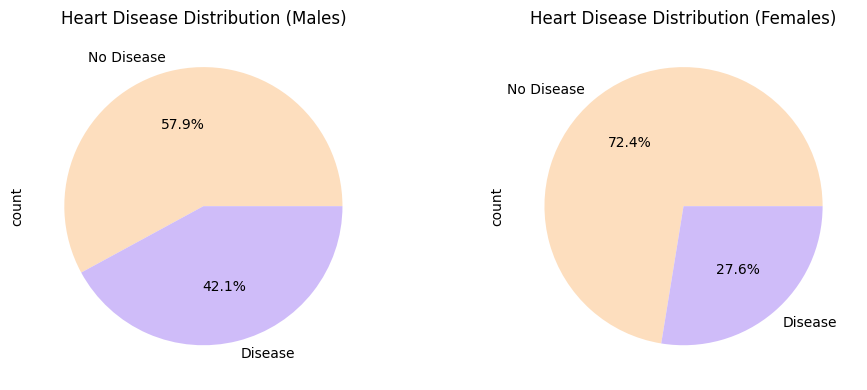

In [ ]:

male_counts = data[data['sex'] == 1]['target'].value_counts()
female_counts = data[data['sex'] == 0]['target'].value_counts()

# Male pie chart
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
male_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#FDDEBE', '#CFBCF9'], labels=['No Disease', 'Disease'])
plt.title('Heart Disease Distribution (Males)')

# Female pie chart
plt.subplot(1, 2, 2)
female_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#FDDEBE', '#CFBCF9'], labels=['No Disease', 'Disease'])
plt.title('Heart Disease Distribution (Females)')

plt.tight_layout()
plt.show()



 1. **Create three visual representations of the dataset using the techniques covered in Chapter 1.**

**Chest Pain Type vs. Target**

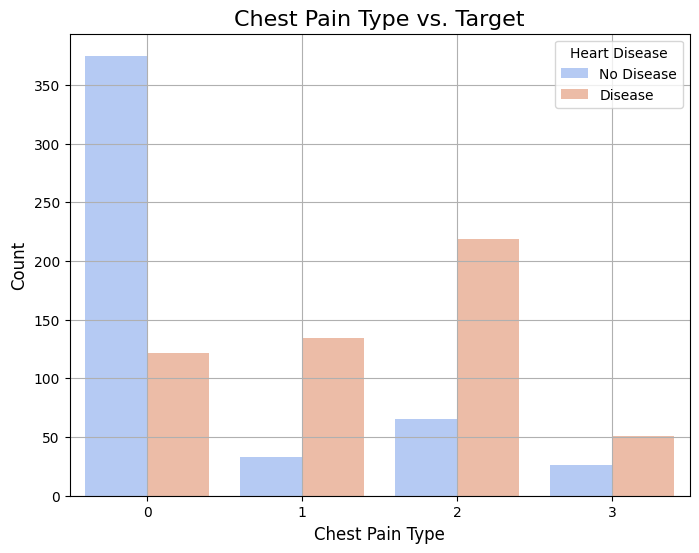

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='cp', hue='target', palette='coolwarm')
plt.title('Chest Pain Type vs. Target', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.grid(True)
plt.show()

This plot compares the type of chest pain people have with whether or not they have heart disease.


Chest Pain Types (0, 1, 2, 3)
*   Type 0
*   Types 1
*   Types 2
*   Types 3

The bars show how many people have each type of chest pain


*   Most people without heart disease in type 0
*   For people with heart disease, other types of chest pain (Types 1, 2, and 3) are more common.

Chest pain is a strong indicator of heart disease. If someone has specific types of chest pain, they are more likely to have heart disease compared to someone with Type 0 pain.

**Cholesterol Distribution**

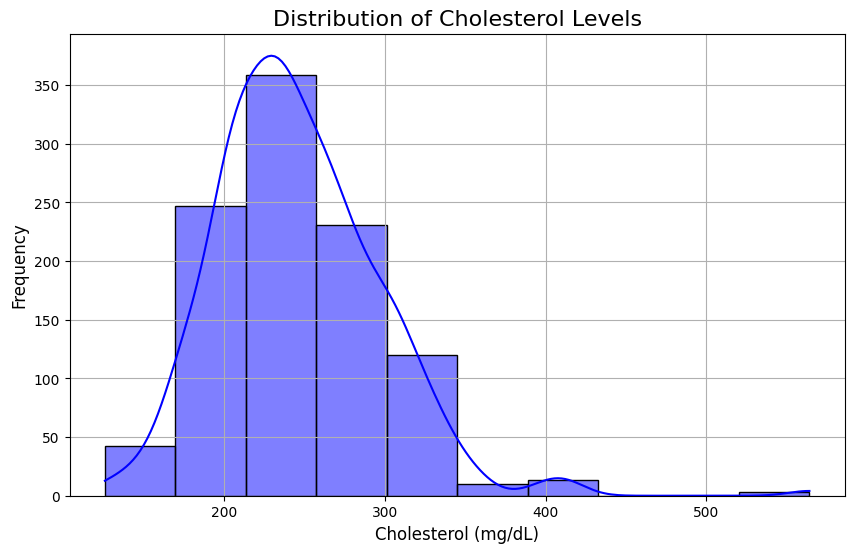

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='chol', kde=True, bins=10, color='blue')
plt.title('Distribution of Cholesterol Levels', fontsize=16)
plt.xlabel('Cholesterol (mg/dL)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

This shows how cholesterol levels are distributed across everyone in the dataset.

*   Most people have cholesterol levels between 200 and 300 mg/dL.


*   The curve on top shows the trend of the data It peaks around 240 mg/dL, meaning many people have cholesterol around this level.


*   The plot also shows some people with very high cholesterol (above 400 mg/dL), which might be unusual or risky.

Cholesterol is a key factor for heart disease. Seeing this distribution helps identify what levels might be linked to heart disease.


**Pairwise Relationships of Features**

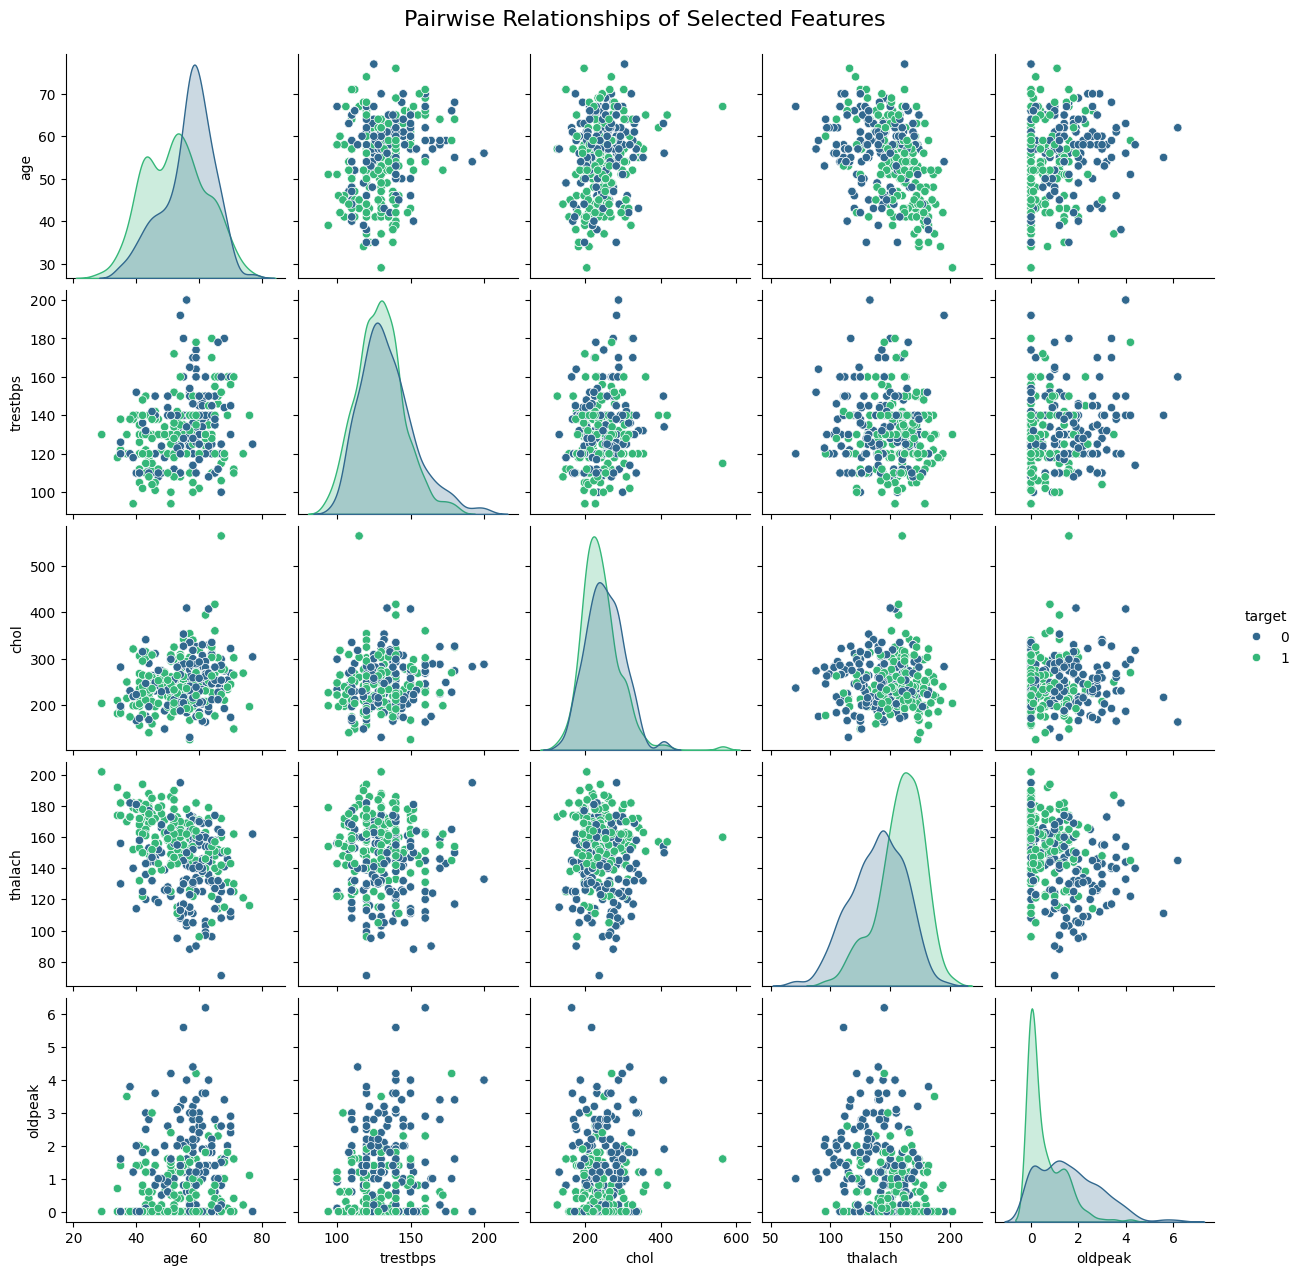

In [ ]:
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(data[selected_features], hue='target', palette='viridis', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Selected Features', y=1.02, fontsize=16)
plt.show()



This plot shows how different features (like age, cholesterol, etc.) are related to each other and how they vary for people with and without heart disease (target = 1 or 0).

**Diagonal Line**

These are histograms that show how each feature is distributed.

For example:
* Age - Most people are between 40 and 70 years old. The green curve (people with heart disease) shows more people in their 50s and 60s have heart disease.
* Thalach (Max Heart Rate): People with heart disease (green) often have lower max heart rates compared to those without heart disease.



---



2. **Divide the dataset into training (80%) and testing (20%) subsets.**

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting features and target
X = data.drop('target', axis=1)
y = data['target']

# Stratified Split (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Verify class proportions
print("Class Distribution in Original Data:")
print(y.value_counts(normalize=True))

print("\nClass Distribution in Training Data:")
print(y_train.value_counts(normalize=True))

print("\nClass Distribution in Testing Data:")
print(y_test.value_counts(normalize=True))


Class Distribution in Original Data:
target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

Class Distribution in Training Data:
target
1    0.513415
0    0.486585
Name: proportion, dtype: float64

Class Distribution in Testing Data:
target
1    0.512195
0    0.487805
Name: proportion, dtype: float64




---



3. **Build two classification models**

**Preproccesing**

In [ ]:
# Define numerical and categorical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Preprocessor for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

**Logistic Regression Model**

In [ ]:
logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Train Logistic Regression Model
logistic_model.fit(X_train, y_train)
y_train_pred_logistic = logistic_model.predict(X_train)
y_test_pred_logistic = logistic_model.predict(X_test)

**Random Forest Model**

In [ ]:
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        n_estimators=50,
        max_depth=5,
        max_features='sqrt',
        min_samples_split=10,
        min_samples_leaf=5
    ))
])

# Train Random Forest Model
random_forest_model.fit(X_train, y_train)
y_train_pred_rf = random_forest_model.predict(X_train)
y_test_pred_rf = random_forest_model.predict(X_test)




---


4. **Calculate and report the training accuracy and testing accuracy for both models.**

In [ ]:
# Calculate and report training and testing accuracies
logistic_train_acc = accuracy_score(y_train, y_train_pred_logistic)
logistic_test_acc = accuracy_score(y_test, y_test_pred_logistic)

rf_train_acc = accuracy_score(y_train, y_train_pred_rf)
rf_test_acc = accuracy_score(y_test, y_test_pred_rf)

print("Training and Testing Accuracies:")
print("\nLogistic Regression:")
print(f"Training Accuracy: {logistic_train_acc:.2f}")
print(f"Testing Accuracy: {logistic_test_acc:.2f}")

print("\nRandom Forest (Hyperparameter-Tuned):")
print(f"Training Accuracy: {rf_train_acc:.2f}")
print(f"Testing Accuracy: {rf_test_acc:.2f}")

# Additional evaluation
print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test, y_test_pred_logistic))

print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

Training and Testing Accuracies:

Logistic Regression:
Training Accuracy: 0.88
Testing Accuracy: 0.87

Random Forest (Hyperparameter-Tuned):
Training Accuracy: 0.92
Testing Accuracy: 0.91

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       100
           1       0.86      0.90      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       100
           1       0.88      0.95      0.92       105

    accuracy                           0.91       205
   macro avg       0.92      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205





---



5. **Provide a brief discussion on the performance of each model.**

**Logistic Regression**

**Accuracy**

The model achieved 88% accuracy on the training set and 87% on the testing set, showing it works well and doesn't overfit.


  * **Performance on No Heart Disease (Class 0)**

  It correctly identifies 89% of those without heart disease (precision).
  It finds 84% of the actual no heart disease cases (recall), but misses a few.


  * **Performance on Heart Disease (Class 1)**

  It correctly identifies 86% of those with heart disease (precision).
  It finds 90% of actual heart disease cases (recall).
  
  
  The model performs consistently well, with balanced scores for both groups.





**Random Forest**

**Accuracy**

The model achieved 92% accuracy on the training set and 91% on the testing set, showing better performance without overfitting.


  * **Performance on No Heart Disease (Class 0)**
  
  It correctly identifies 95% of those without heart disease (precision).It finds 87% of actual no heart disease cases (recall), missing fewer than Logistic Regression.


  * **Performance on Heart Disease (Class 1)**
  
  It correctly identifies 88% of those with heart disease (precision). It finds 95% of actual heart disease cases (recall).


This model performs better across the board, with higher accuracy and balanced results.




Random Forest does a better job than Logistic Regression, improving accuracy by 4% and making fewer mistakes.
If we need a simpler model that is easier to explain, we can go with Logistic Regression. But if we want the most accurate predictions, we can use Random Forest.



---



6. **Calculate the absolute difference in test set accuracy between Model A and Model B using the original test labels. Write a conclusion comparing the models based on this difference.**

In [ ]:
# Observed accuracy differences
acc_lr = logistic_test_acc
acc_rf = rf_test_acc
observed_diff = acc_rf - acc_lr

print(f"Observed Accuracy Difference: {observed_diff:.2f}")

Observed Accuracy Difference: 0.04


The absolute difference in test set accuracy between Model A (Logistic Regression) and Model B (Random Forest) is 0.04 (4%). This small difference suggests that while the Random Forest model performs slightly better than Logistic Regression, the improvement is minimal and may not justify the increased complexity of the Random Forest model. Based on this difference, both models appear to have similar predictive performance on this dataset.



---



 7. **Validate the test set performance difference using a permutation test as covered in Chapter 7.**

In [ ]:
# Test set true labels and predictions
y_test = y_test.values  # True labels from the test set
y_pred_lr = logistic_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

In [ ]:
# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Permutation test
n_permutations = 10000
accuracy_differences = []

for _ in range(n_permutations):
    # Shuffle the predicted labels
    y_pred_combined = np.concatenate([y_pred_lr, y_pred_rf])
    np.random.shuffle(y_pred_combined)

    # Split shuffled predictions into two groups
    shuffled_pred_lr = y_pred_combined[:len(y_pred_lr)]
    shuffled_pred_rf = y_pred_combined[len(y_pred_lr):]

    # Compute accuracy for each shuffled group
    shuffled_acc_lr = calculate_accuracy(y_test, shuffled_pred_lr)
    shuffled_acc_rf = calculate_accuracy(y_test, shuffled_pred_rf)

    # Record accuracy difference
    accuracy_differences.append(shuffled_acc_rf - shuffled_acc_lr)

# Null distribution of accuracy differences
accuracy_differences = np.array(accuracy_differences)

# Calculate p-value
p_value = np.mean(np.abs(accuracy_differences) >= np.abs(observed_diff))

# Print results
print(f"Observed Accuracy Difference: {observed_diff:.4f}")
print(f"P-value: {p_value:.4f}")

Observed Accuracy Difference: 0.0390
P-value: 0.4463


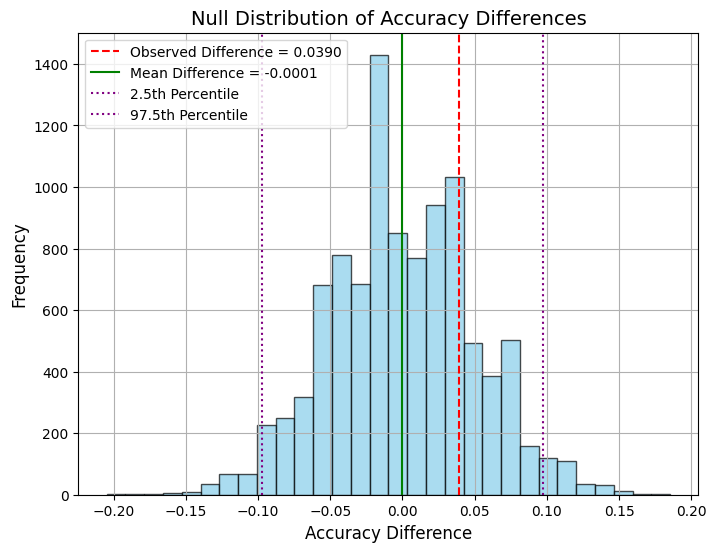

Mean of Null Distribution: -0.0001
Standard Deviation of Null Distribution: 0.0495
2.5th Percentile: -0.0976
97.5th Percentile: 0.0976


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Null distribution of accuracy differences
mean_diff = np.mean(accuracy_differences)
std_diff = np.std(accuracy_differences)
percentiles = np.percentile(accuracy_differences, [2.5, 97.5])

# Visualization of the null distribution
plt.figure(figsize=(8, 6))
plt.hist(accuracy_differences, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=observed_diff, color='red', linestyle='--', label=f"Observed Difference = {observed_diff:.4f}")
plt.axvline(x=mean_diff, color='green', linestyle='-', label=f"Mean Difference = {mean_diff:.4f}")
plt.axvline(x=percentiles[0], color='purple', linestyle=':', label="2.5th Percentile")
plt.axvline(x=percentiles[1], color='purple', linestyle=':', label="97.5th Percentile")

plt.title("Null Distribution of Accuracy Differences", fontsize=14)
plt.xlabel("Accuracy Difference", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

# Print distribution summary
print(f"Mean of Null Distribution: {mean_diff:.4f}")
print(f"Standard Deviation of Null Distribution: {std_diff:.4f}")
print(f"2.5th Percentile: {percentiles[0]:.4f}")
print(f"97.5th Percentile: {percentiles[1]:.4f}")


* **Observed Difference**
  
  The observed difference in test set accuracy between Model A (Logistic Regression) and Model B (Random Forest) is 0.04 (4%). This is a much smaller difference compared to the previous result.


* **Null Distribution**

  The null distribution of accuracy differences (from permutation testing) represents the differences expected by chance if there were no actual performance difference between the models.


* **P-value**

  From the permutation test, the p-value was 0.4463, which is much greater than the commonly used significance threshold of 0.05.


**Conclusion**

  Since the observed accuracy difference is small and not significantly different from the null distribution (as reflected by the high p-value), we fail to reject the null hypothesis. This means the improvement in accuracy between the Random Forest and Logistic Regression models is not statistically significant.

Both models perform similarly on this dataset, and the Random Forest no longer shows a statistically significant advantage over Logistic Regression for predicting heart disease.